
# EMATM0048: Software Development Programming and Algorithms (SDPA)
# `Tutorial 6 - Complexity analysis`

This tutorial presents practical exercises for materials covered in Teaching Sessions 6A and 6B in SDPA. The tutorial is in three parts; part 1: algorithm complexity analysis, part 2: Searching algorithms, and part 3: Sorting algorithms

## Part 1:  Algorithm Complexity analysis

Complexity analysis is a way to answer an interesting question which often arises. When two programs solve the same problem but look different, is one program better than the other?
## 1.1 Timing approach: 
Consider the two different variations of the following function. The function solves a familiar problem, computing the sum of the first $n$ integers. The algorithm uses the idea of an accumulator variable that is initialized to 0. The solution then iterates through the $n$ integers, adding each to the accumulator.

### Version 1: 

In [1]:
import time
def sumOfN1(n):
    start = time.time()
    theSum = 0
    for i in range(1,n+1):
        theSum = theSum + i
    end = time.time()
    return theSum,end-start

This implemnation shows the sumOfN1 function with the timing calls embedded before and after the summation. The function returns a tuple consisting of the result and the amount of time (in seconds) required for the calculation. If we perform the sum of three big integers, we get the following:

In [2]:
print("Sum is %d required %10.7f seconds"%sumOfN1(10000))
print("Sum is %d required %10.7f seconds"%sumOfN1(1000000))
print("Sum is %d required %10.7f seconds"%sumOfN1(10000000))

Sum is 50005000 required  0.0009615 seconds
Sum is 500000500000 required  0.0451758 seconds
Sum is 50000005000000 required  0.3937895 seconds


### Version 2: 

Let's try another version to solve the same problem. 

In [3]:
def sumOfN2(n):
    start = time.time()
    theSum= (n*(n+1))/2
    end = time.time()
    return theSum,end-start

print(sumOfN2(10))

(55.0, 0.0)


In [4]:
print("Sum is %d required %10.7f seconds"%sumOfN2(10000))
print("Sum is %d required %10.7f seconds"%sumOfN2(1000000))
print("Sum is %d required %10.7f seconds"%sumOfN2(10000000))

Sum is 50005000 required  0.0000000 seconds
Sum is 500000500000 required  0.0000000 seconds
Sum is 50000005000000 required  0.0000000 seconds


There are two important things to notice about this output. First, the times recorded above are shorter than any of the previous examples. Second, they are very consistent no matter what the value of n. It appears that sumOfN2 is hardly impacted by the number of integers being added. A better way to measure the complexity is with big O notation

## 1.2 Big O Approach

When trying to characterize an algorithm’s efficiency in terms of execution time, independent of any particular program or computer, it is important to quantify the number of operations or steps that the algorithm will require. If each of these steps is considered to be a basic unit of computation, then the execution time for an algorithm can be expressed as the number of steps required to solve the problem.

Comparing the summation algorithms shown earlier, the function sumOfN1 the number of assignment statements is 1 (𝑡ℎ𝑒𝑆𝑢𝑚=0) plus the value of n (the number of times we perform 𝑡ℎ𝑒𝑆𝑢𝑚=𝑡ℎ𝑒𝑆𝑢𝑚+𝑖). We can then say this function is of O(n). On the other hand, the other implementation of SumOfN2 has an order of O(1) as the running time is '**almost**' independent on the input size. 

Let's try another example, suppose that we have the code shown below. Although this program does not really do anything, it is instructive to see how we can take actual code and analyze performance.

In [5]:
n= 10

a=5
b=6
c=10
for i in range(n):
    for j in range(n):
        x = i * i
        y = j * j
        z = i * j
for k in range(n):
    w = a*k + 45
    v = b*b
d = 33

The number of assignment operations is the sum of four terms. 
- The first term is the constant 3, representing the three assignment statements at the start of the fragment. 
- The second term is $3𝑛^2$, since there are three statements that are performed $𝑛^2$ times due to the nested iteration. 
- The third term is 2𝑛, two statements iterated n times. 
- Finally, the fourth term is the constant 1, representing the final assignment statement. 

This gives us total number of operations of $3+3𝑛^2+2𝑛+1$. By looking at the exponents, we can easily see that the $𝑛^2$ term will be dominant and therefore this fragment of code is 𝑂($𝑛^2$). 

### Example: 

A good example problem for showing algorithms with different orders of magnitude is the classic anagram detection problem for strings. One string is an anagram of another if the second is simply a rearrangement of the first. For example, 'heart' and 'earth' are anagrams. The strings 'python' and 'typhon' are anagrams as well.
There are multiple solutions for this problem: 
###  Version 1: 
If the two strings of equal length, and if each character in the first string exist in the second

In [11]:
def anagramSolution1(s1,s2):
    stillOK = True # 1
    if len(s1) != len(s2): # 2
        stillOK = False # 3

    alist = list(s2) # 4
    pos1 = 0 # 5

    while pos1 < len(s1) and stillOK: # 7
        pos2 = 0 # 7 + X*1
        found = False # 7+X*2
        while pos2 < len(alist) and not found: # 7 + X*(2+(Y*2))
            if s1[pos1] == alist[pos2]: # 7 + X*(2+(Y*3))
                found = True # 7 + X*(2+(Y*4))
            else:
                pos2 = pos2 + 1 
        if found: # 7 + X*(3+(Y*4))
            alist[pos2] = None # 7 + X*(4+(Y*4))
        else:
            stillOK = False

        pos1 = pos1 + 1 # 7 + X*(5+(Y*4))

    return stillOK

print(anagramSolution1('abcd','dcba'))


True


### <font color='Blue'>Ex# 1: </font> :   What is the complexity of this solution?

X = len(s1) \
Y = len(s2) \
\
time complexity: $7 + X*(5+(Y*4))$: $O(n^2)$

###  Version 2:  
Another solution to the anagram problem will make use of the fact that even though s1 and s2 are different, they are anagrams only if they consist of exactly the same characters. So, if we begin by sorting each string alphabetically, from a to z, we will end up with the same string if the original two strings are anagrams
### <font color='blue'>Ex# 2: </font> :  Write your code to implement this solution? What is the complexity?  
Hint: You will need to choose how you want to sort your list. Check this link for more details https://docs.python.org/3/howto/sorting.html

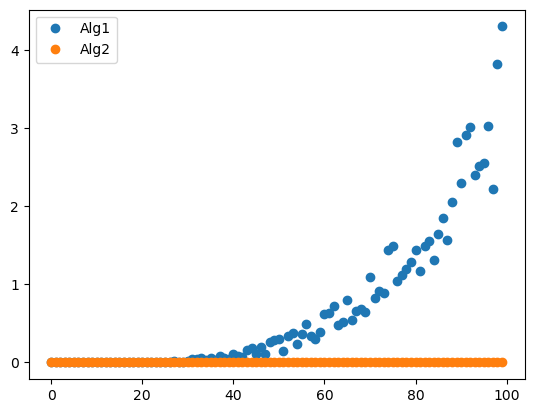

In [43]:
import random, string, time
def anagramSolution2(s1,s2):
    # O(nlog(n))
    if len(s1) != len(s2): #or set(s1) != set(s2): 
        return False
    else:
        s1 = sorted(s1)
        s2 = sorted(s2)
        
        for i in range(len(s1)):
            if s1[i] != s2[i]:
                return False
            
    return True 

def testAnagram(n):
    letters = string.ascii_lowercase
    anagram = [random.choice(letters) for i in range(n)]
    s1 = ''.join(anagram)
    random.shuffle(anagram)
    if random.randint(0,2) == 1:
        s2 = ''.join(anagram)
    else:
        s2 = ''.join([random.choice(letters) for i in range(n)])
    return s1,s2
    
times1 = []
times2 = []
for i in range(100):
    s1,s2 = testAnagram(i**2)
    time_start = time.time()
    sol1 = anagramSolution1(s1,s2)
    time_end = time.time()
    t1 = time_end-time_start
    
    time_start = time.time()
    sol2 = anagramSolution2(s1,s2)
    time_end = time.time()
    t2 = time_end-time_start
    
    if sol1 != sol2:
        raise
    
    print(f"n{i}: {2*(i+100)} | {sol1} {sol2} | {t1} {t2}", end = "\r")
    times1.append(t1)
    times2.append(t2)
    
import matplotlib.pyplot as plt
plt.plot(times1, 'o', label='Alg1')
plt.plot(times2, 'o', label='Alg2')
plt.legend()
#plt.yscale('log')
plt.show()


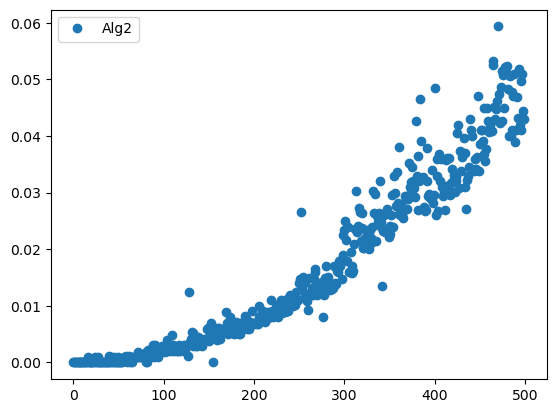

In [44]:
times2 = []
for i in range(500):
    s1,s2 = testAnagram(i**2)

    
    time_start = time.time()
    sol2 = anagramSolution2(s1,s2)
    time_end = time.time()
    t2 = time_end-time_start
    

    
    print(f"n{i}: {i**2} | {sol2} | {t2}", end = "\r")
    times1.append(t1)
    times2.append(t2)
    
import matplotlib.pyplot as plt
plt.plot(times2, 'o', label='Alg2')
plt.legend()
#plt.yscale('log')
plt.show()

--------------

## Part 2:  Searching Algorithms
Searching is ubiquitous and lies at the heart of computer science. In this section, you’ll learn about searching for an element in a list of items. 

### 2.1 Linear Search: 
Python already ships with linear search, so there’s no point in writing it yourself. The list data structure, for example, exposes a method that will return the index of an element or raise an exception otherwise:

In [7]:
fruits = ['orange', 'plum', 'banana', 'apple']
fruits.index('banana')

2

In [8]:
fruits.index('blueberry')

ValueError: 'blueberry' is not in list

This can also tell you if the element is present in the collection, but a more Pythonic way would involve using the versatile in operator:

In [9]:
'banana' in fruits

True

In [10]:
'blueberry' in fruits

False

### 2.2 Binary/Bisection Search
Binary search in Python can be performed using the built-in bisect module, which also helps with preserving a list in sorted order. It’s based on the bisection method for finding roots of functions. https://docs.python.org/3/library/bisect.html
To find the index of an existing element in a sorted list, you want to bisect_left():

In [11]:
import bisect
sorted_fruits = ['apple', 'banana', 'orange', 'plum']
bisect.bisect_left(sorted_fruits, 'banana')


1

The output tells you that a banana is the second fruit on the list because it was found at index 1. However, if an element was missing, then you’d still get its expected position:

In [12]:
bisect.bisect_left(sorted_fruits, 'apricot')

1

In [13]:
bisect.bisect_left(sorted_fruits, 'watermelon')

4

Even though these fruits aren’t on the list yet, you can get an idea of where to put them. For example, an apricot should come between the apple and the banana, whereas a watermelon should become the last element.

If you had multiple bananas, then bisect_left() would return the leftmost instance:

In [14]:
sorted_fruits = [
    'apple',
    'banana', 'banana', 'banana',
    'orange',
    'plum'
]
bisect.bisect_left(sorted_fruits, 'banana')

1

Predictably, to get the rightmost banana, you’d need to call bisect_right() or its bisect() alias. However, those two functions return one index further from the actual rightmost banana, which is useful for finding the insertion point of a new element:

In [15]:
bisect.bisect_right(sorted_fruits, 'banana')

4

### 2.3 Hashing: 
The concept of Hashing aims at building a data structure that can be searched in 𝑂(1) time. 
A hash table is a collection of items which are stored in such a way as to make it easy to find them later. Each position of the hash table, often called a slot, can hold an item and is named by an integer value starting at 0.

The mapping between an item and the slot where that item belongs in the hash table is called the **hash function**. The hash function will take any item in the collection and return an integer in the range of slot names, between 0 and m-1. 

Assume that we have the set of integer item 54, 26, 93, and 31. Our first hash function, sometimes referred to as the “remainder method,” simply takes an item and divides it by the table size, let's assume our hash table of size 11,  returning the remainder as its hash value (ℎ(𝑖𝑡𝑒𝑚)=𝑖𝑡𝑒𝑚%11). Hash value will be calculated as: 
- 54>> 10
- 26>> 4
- 93>> 5
- 31>> 9

Each item will be allocated to the corresponding solt according to the output of the hash function. Now when we want to search for an item, we simply use the hash function to compute the slot name for the item and then check the hash table to see if it is present. This searching operation is 𝑂(1)

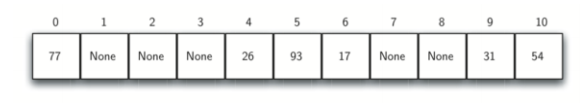

#### Check whether an object is hashable: 
The hash() method returns the hash value of an object if it has one.


In [4]:
# hash for integer unchanged
print('Hash for 181 is:', hash(181))

# hash for decimal
print('Hash for 181.23 is:',hash(181.23))

# hash for string
print('Hash for Python is:', hash('Python'))

Hash for 181 is: 181
Hash for 181.23 is: 530343892119126197
Hash for Python is: -2452613484549447033


In [17]:
# tuple of vowels
vowels = ('a', 'e', 'i', 'o', 'u')
print('The hash is:', hash(vowels))

The hash is: -5761000112591759508


In [18]:
vowels = ['a', 'e', 'i', 'o', 'u']
print('The hash is:', hash(vowels))

TypeError: unhashable type: 'list'

### <font color='blue'>Ex# 3: </font> :  What if one item in the tuple is a list, will it still be hashable?

In [46]:
a = ([1,2,3],2,3)
print(hash(a))

TypeError: unhashable type: 'list'

--------------

## Part 3: Sorting Algorithms: 

Please refer to the lecture script for implementation of: Bubble sort, Insertion sort, Merge sort and Quick sort. In this part, we will discuss selection sort and some more examples based on sorting. 

### 3.1 Selection Sort
Another famous sorting algorithm is selection sort. In selection sort we start by finding the minimum value in a given list and move it to a sorted list. Then we repeat the process for each of the remaining elements in the unsorted list. The next element entering the sorted list is compared with the existing elements and placed at its correct position. So at the end all the elements from the unsorted list are sorted.

### <font color='blue'>EX# 4: </font> :  Complete the following code for selection sort and try to answer these questions: 

- How many swaps are performed when we apply selection sort to a list of N items?
- How many comparisons are performed when we apply selection sort to a list of N items?
    - How many comparisons are performed when finding the smallest element when the unsorted portion of the list has M items?
    - Sum over all the values of M encountered when sorting the list of length N to find the total number of comparisons.
- The number of assignments (to the candidate smallest number) performed during the search for a smallest element is at most one more than the number of comparisons. Use this to find an upper limit on the total number of assignments performed while sorting a list of length N.
- Use the results of the previous question to find an upper bound on the total number of operations (swaps, comparisons and assignments) performed? Which term in the number of operations will dominate for large lists?

In [47]:
def selection_sort(items):
    """Sorts a list of items into ascending order using the
       selection sort algoright.
       """
    for step in range(len(items)):
        # Find the location of the smallest element in
        # items[step:].
        location_of_smallest = step
        for location in range(step, len(items)):
            # TODO: determine location of smallest
            if items[location] < items[location_of_smallest]:
                location_of_smallest = location
            ...
        # TODO: Exchange items[step] with items[location_of_smallest]
        items[step], items[location_of_smallest] = items[location_of_smallest], items[step]
        ...

a = [1,24,65,2,12,3]
selection_sort(a)
print(a)

[1, 2, 3, 12, 24, 65]


In [ ]:
import time

a = 

### 3.2 Python's sorting algorithm: 
Python’s default sorting algorithm, which is used by the built-in sorted function as well as the sort method of list objects, is called Timsort. It’s an algorithm developed by Tim Peters in 2002 for use in Python https://en.wikipedia.org/wiki/Timsort. Timsort is a modified version of merge sort which uses insertion sort to arrange the list of items into conveniently mergeable sections.

**Syntax:**  sorted(iterable, key=key, reverse=reverse)

Where : 
- iterable: The sequence to sort, list, dictionary, tuple etc.
- key:(optional) a function to execute to decide the order. Default is None
- reverse	: (optional) A Boolean. False will sort ascending, True will sort descending. Default is False

In [20]:
# vowels list
py_list = ['e', 'a', 'u', 'o', 'i']
print(sorted(py_list))

# string
py_string = 'Python'
print(sorted(py_string))

# vowels tuple
py_tuple = ('e', 'a', 'u', 'o', 'i')
print(sorted(py_tuple))

['a', 'e', 'i', 'o', 'u']
['P', 'h', 'n', 'o', 't', 'y']
['a', 'e', 'i', 'o', 'u']


###  Sorting the list using sorted() having a key function

In [48]:
# take the second element for sort
def take_second(elem):
    return elem[1]


# random list
random = [(2, 2), (3, 4), (4, 1), (1, 3)]

# sort list with key
sorted_list = sorted(random, key=take_second)

# print list
print('Sorted list:', sorted_list)

Sorted list: [(4, 1), (2, 2), (1, 3), (3, 4)]


### Sorting with multiple keys
Let us suppose that we have the following list:

In [22]:
# Nested list of student's info in a Science Olympiad
# List elements: (Student's Name, Marks out of 100, Age)

participant_list = [
    ('Alison', 50, 18),
    ('Terence', 75, 12),
    ('David', 75, 20),
    ('Jimmy', 90, 22),
    ('John', 45, 12)
]

We want to sort the list in such a way that the student with the highest marks is in the beginning. In case the students have equal marks, they must be sorted so that the younger participant comes first.

We can achieve this type of sorting with multiple keys by returning tuple instead of a number.

Two tuples can be compared by comparing their elements starting from first. If there is a tie (elements are equal), the second element is compared, and so on.

In [23]:
print((1,3) > (1, 4))
print((1, 4) < (2,2))
print((1, 4, 1) < (2, 1))


False
True
True


Let's use this logic to build our sorting logic.

In [24]:
def sorter(item):
    # Since highest marks first, least error = most marks
    error = 100 - item[1]
    age = item[2]
    return (error, age)


sorted_list = sorted(participant_list, key=sorter)
print(sorted_list)

[('Jimmy', 90, 22), ('Terence', 75, 12), ('David', 75, 20), ('Alison', 50, 18), ('John', 45, 12)]


### <font color='blue'>Ex# 5: </font> Find the smallest and second smallest elements in a list

In this example , we try to find the two smallest items in a list. Many solutions can be developed for this problem. 

Input:  L = [12, 13, 1, 10, 34, 1]

Output: The smallest element is 1 and 
        second Smallest element is 10

- A Simple Solution is to sort the array in increasing order. The first two elements in sorted array would be two smallest elements. Time complexity of this solution is O(n Log n), depends on the sorting algorithm.

- A Better Solution is to scan the array twice. In first traversal find the minimum element. Let this element be x. In second traversal, find the smallest element greater than x. Time complexity of this solution is O(n).



In [56]:
import sys 
  
def print2Smallest(L):
    min1 = 2**32 - 1
    min2 = 2**32 - 1
    for num in L:
        if num < min1:
            min1 = num
    
    for num in L:
        if num < min2 and num != min1:
            min2 = num
            
    print(min1,min2)
        
  
    

# Driver function to test above function 
list1 = [12, 13, 1, 10, 34, 1] 
print2Smallest(list1) 
  

1 10


## Challenges: 

### <font color='blue'>Ch# 1: </font> 
Would you be able to provide an implementation of the anagram algorithm with O(n) complexity?
O
### <font color='blue'>Ch# 2: </font> 
Analysis often assumes "worse case" scenarios.  Now consider a "best case" scenario that might benefit insertion sort over selection sort.  Under what circumstances (if any) is insertion sort faster than selection sort?


## References and extra resources
- https://realpython.com/binary-search-python/
- https://runestone.academy/runestone/books/published/pythonds/AlgorithmAnalysis/
- https://python-textbok.readthedocs.io/
